In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score

%matplotlib inline

pd.set_option('display.max_columns', None)

## Step 1: Reading the Data

In [2]:
# Reading the dataset
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


In [7]:
empty_percentage=(df.isnull().sum() / len(df)) * 100

In [8]:
# Filter column names with more than 30% null values
columns_with_high_null = empty_percentage[empty_percentage > 30].index

print(columns_with_high_null)

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


## Observations:
- There are many columns which is having null values more than 30%

## Dropping columns having more than 30% null values


In [9]:
df.shape

(9240, 37)

In [10]:
# dropping columns with more than 30% null values
df = df.drop(columns_with_high_null, axis=1)

df.shape

(9240, 31)

In [11]:
# Filter column names with more than 30% null values
columns_with_high_null = empty_percentage[empty_percentage > 30].index

print(columns_with_high_null)

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [12]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [14]:
#Checking column Lead Origin
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [15]:
#Checking value counts in 
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

### google and Google both are same so let's replace the google with Google

In [16]:
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [17]:
#checking the nulls 
df['Lead Source'].isnull().sum()

36

In [18]:
#Since there are 36 values are null we can replace using mode
print('The most frequent values in Lead Source Column is :',df['Lead Source'].mode()[0])
df['Lead Source'] = df['Lead Source'].replace(np.nan, df['Lead Source'].mode()[0])

The most frequent values in Lead Source Column is : Google


In [19]:
## Checking the column Total visits
df['TotalVisits'].isna().sum()

137

In [20]:
#There are 137 null values in the Total visits column. Since it is continous variable we can replace it by median which is prone to outliers.
print('The median of "Total Visits" variable is :' ,df['TotalVisits'].median())
df['TotalVisits'] = df['TotalVisits'].replace(np.nan, df['TotalVisits'].median())

The median of "Total Visits" variable is : 3.0


In [21]:
## Checking column Page Views Per Visit
df['Page Views Per Visit'].isna().sum()

137

In [22]:
#There are 137 null values in the Page Views Per Visit column. Since it is continous variable we can replace it by median which is prone to outliers.
print('The median of "Page Views Per Visit" variable is :' ,df['Page Views Per Visit'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())

The median of "Page Views Per Visit" variable is : 2.0


In [23]:
## Checking column Last Activity
df['Last Activity'].isna().sum()

103

In [24]:
#There are 1o3 null values in the Last Activity Per Visit column. Since it is categorical variable we can replace it by using mode of this variable..
print('The mode of "Last Activity" variable is :' ,df['Last Activity'].mode())
df['Last Activity'] = df['Last Activity'].replace(np.nan, df['Last Activity'].mode()[0])

The mode of "Last Activity" variable is : 0    Email Opened
Name: Last Activity, dtype: object


In [25]:
#Checking Column Specialization
## Checking column Last Activity
df['Specialization'].value_counts()


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
# Specialization has 1942 values has 'Select' which is nothing but nan values
df['Specialization'] = df['Specialization'].replace('Select', np.nan)

In [27]:
(df['Specialization'].isna().sum()/df.shape[0])*100

36.58008658008658

In [28]:
# More than 36% of values are null so we can drop this feature

In [29]:
df.drop('Specialization',axis=1,inplace=True)

In [30]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
# 'How did you hear about X Education' has 5043 values has 'Select' which is nothing but nan values
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', np.nan)

In [32]:
(df['How did you hear about X Education'].isna().sum()/df.shape[0])*100

78.46320346320347

In [33]:
# More than 78% of values are null so we can drop this feature
df.drop('How did you hear about X Education',axis=1,inplace=True)

In [34]:
#Checking Column City
df['City'].value_counts()


Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
# 'City' has 2249 values has 'Select' which is nothing but nan values
df['City'] = df['City'].replace('Select', np.nan)

In [36]:
(df['City'].isna().sum()/df.shape[0])*100

39.70779220779221

In [37]:
# More than 39% of values are null so we can drop this feature
df.drop('City',axis=1,inplace=True)

In [38]:
# Checking 'What is your current occupation'
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
df['What is your current occupation'].isna().sum()

2690

In [40]:
#Since the null values are in largr number so here we can introduce new category i.e. 'No Information'
df['What is your current occupation']= df['What is your current occupation'].replace(np.nan, 'No Information')

In [41]:
# Checking 'What matters most to you in choosing a course' feature
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
df['What matters most to you in choosing a course'].isna().sum()

2709

In [43]:
(6528/df.shape[0])*100

70.64935064935065

In [44]:
##Most of the values 70% belongs to the one category only and other are very low in fractions. So we can drop this feature
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [45]:
#Checking Country column
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [46]:
# check the percentage of India as value in the country column
print(round(100*len(df[df['Country'] == 'India'])/len(df['Country']),2))

70.26


In [47]:
df.drop('Country',axis=True,inplace=True)

In [48]:
# Now check other columns since we have already handled the columns which had null values
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [49]:
# 'Lead Profile' has 4146 values has 'Select' which is nothing but nan values
df['Lead Profile'] = df['Lead Profile'].replace('Select', np.nan)

In [50]:
df['Lead Profile'].isna().sum()/df.shape[0]

0.7418831168831169

In [51]:
# More than 74% of values are null so we can drop the column.
df.drop('Lead Profile',axis=1,inplace=True)

In [52]:
round((df.isnull().sum()/df.shape[0])*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

## Now checking other columns to verify

In [53]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [54]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [55]:
df.drop("Magazine",axis=1,inplace=True)

In [56]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [57]:
df.drop("Receive More Updates About Our Courses",axis=1,inplace=True)

In [58]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [59]:
df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [60]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [61]:
df.drop('Get updates on DM Content',axis=1,inplace=True)

In [62]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [63]:
df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [64]:
df.shape

(9240, 20)

In [65]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


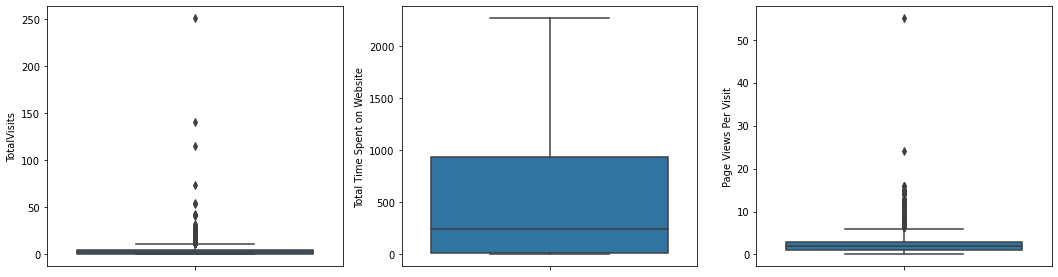

In [66]:
## Checking the outliers

plt.figure(figsize=(18, 22))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = df)
plt.show()

In [67]:
#Removing the outliers considering 99 percentile as threshold

def remove_outliers(df, column_name, quantile_threshold):
    """
    Removes outliers beyond the specified quantile threshold for a given column in a DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        quantile_threshold (float): The quantile threshold beyond which values will be removed.
        
    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """
    quantile_value = df[column_name].quantile(quantile_threshold)
    filtered_df = df[df[column_name] < quantile_value]
    return filtered_df

# Load your dataset (assuming you have a DataFrame named 'leadInfo')
# leadInfo = pd.read_csv('your_dataset.csv')

# Define the quantile threshold for outlier removal
outlier_threshold = 0.99

# Remove outliers from 'TotalVisits' column
df = remove_outliers(df, 'TotalVisits', outlier_threshold)

# Display descriptive statistics for 'TotalVisits' column
percentiles_to_display = [0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
total_visits_stats = df["TotalVisits"].describe(percentiles=percentiles_to_display)

# Print the descriptive statistics
print(total_visits_stats)


count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64


In [68]:
# Define the quantile threshold for outlier removal
outlier_threshold = 0.99
# Remove outliers from 'TotalVisits' column
df = remove_outliers(df, 'Page Views Per Visit', outlier_threshold)



In [69]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
max,660737.000000,1.000000,16.000000,2272.000000,8.000000


## Data Analysis

### Lead Origin Vs Converted

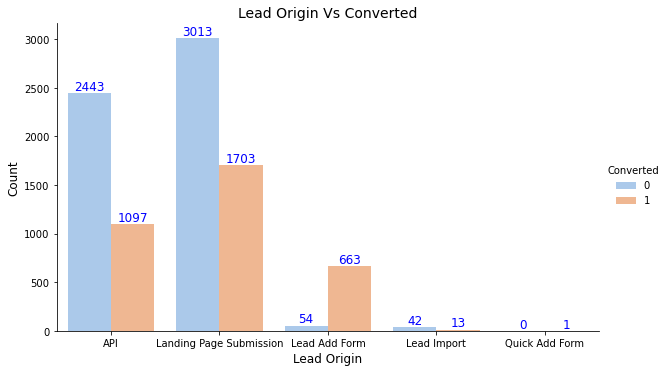

In [70]:
# Analysis on Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=df,palette="pastel", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

### Observtions:
- Most number of conversions are coming from Landing Page Submission
- Least is from Quick Add Form

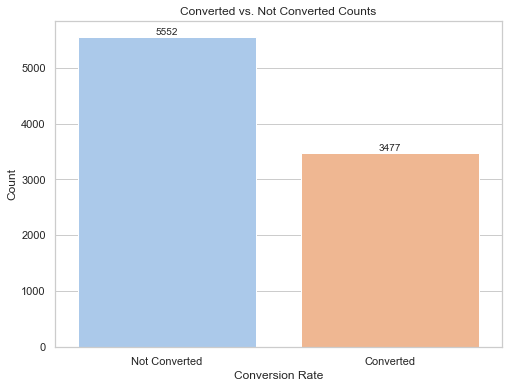

In [71]:
#Analysis on Converted

# Set the style of the plot
sns.set(style="whitegrid")
counts=df['Converted'].replace({0: "Not Converted", 1: "Converted"})
# Count the occurrences of each status
conv_counts = counts.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=conv_counts.index, y=conv_counts.values, palette="pastel")

# Add labels and title
plt.xlabel("Conversion Rate")
plt.ylabel("Count")
plt.title("Converted vs. Not Converted Counts")

# Add count values on top of the bars
for index, value in enumerate(conv_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


### Observations:
- Around 39% of Leads are converted. So the overall conversion rate is 39%
- Around 61% of leads are not converting


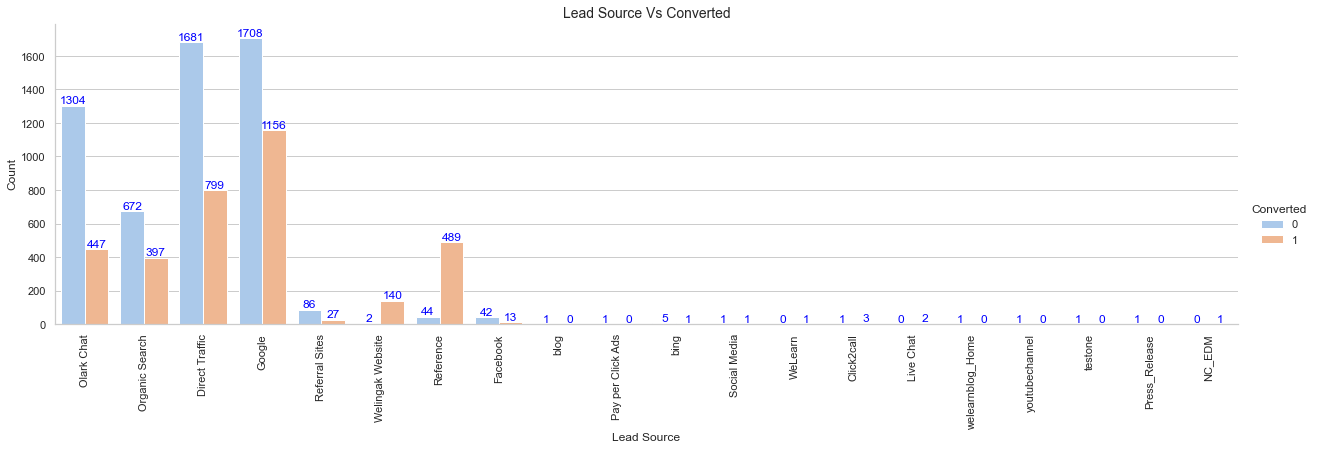

In [72]:
# Analysis on Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=df, palette="pastel", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

### Observations
- Most of the traffic is coming from Google & on Direct
- Maximum conversion is from google & Direct Traffic

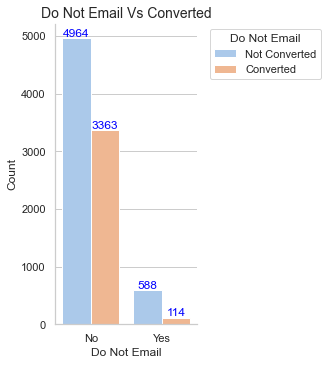

In [73]:
#Analysis on Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=df, palette="pastel",legend=False, aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
# Add legends
plt.legend(title="Do Not Email", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observations:
- Conversions who opt in for emails has major conversion.
- Those who opt-out for emails has lower conversion

In [74]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

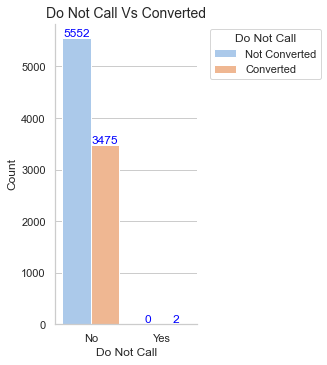

In [75]:
# Analysis on Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=df,legend=False, palette="pastel", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

# Add legends
plt.legend(title="Do Not Call", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observations:
- Since there are only two records where call was not happened. Most of the records are where calls are done.
- Most of the conversions are coming when the call is made

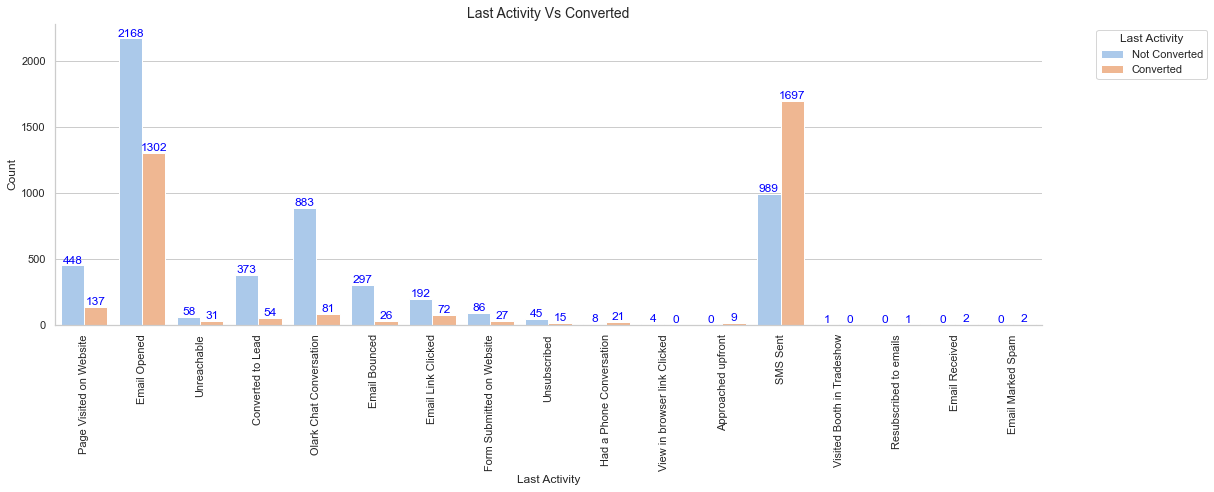

In [76]:
# Analysis on Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", legend=False,kind="count", data=df, palette="pastel", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.legend(title="Last Activity", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Observqations:
- There are Most of the conversions are coming through SmS ans Email.


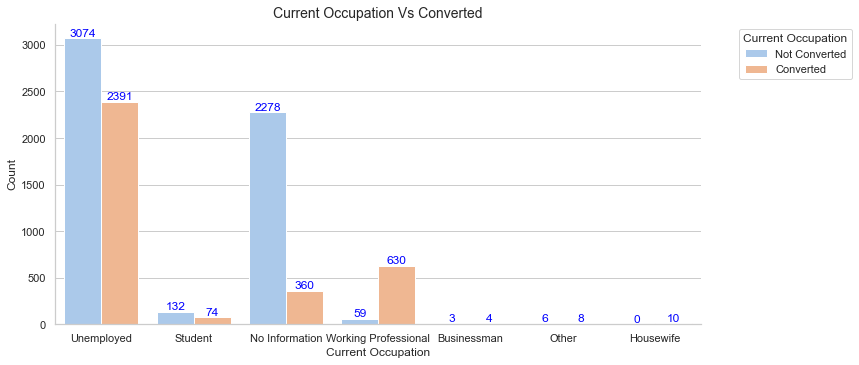

In [77]:
# Analysis on current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted",legend=False, kind="count", data=df, palette="pastel", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.legend(title="Current Occupation", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Observations:
- Most of the leads are unemployed.
- for working professional current Occupation the conversion rate is higher.

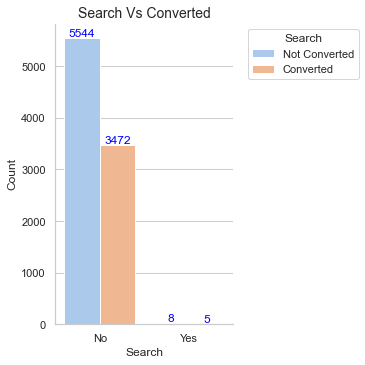

In [78]:
#Analysis on Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", legend=False, data=df, palette="pastel", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
plt.legend(title="Search", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Observation:
- Conversion rate is high who are not through Search.

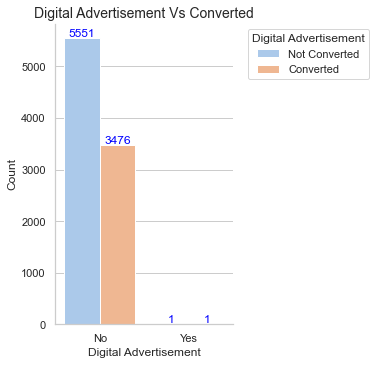

In [79]:
#Analysis on Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count",legend=False, data=df, palette="pastel", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
plt.legend(title="Digital Advertisement", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Observations:
- Only two leads came from digital advertisement of which one has been converted.

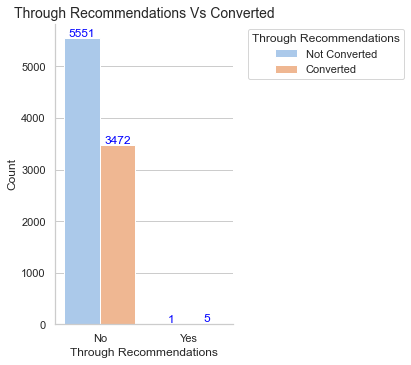

In [80]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=df,legend=False, palette="pastel", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
plt.legend(title="Through Recommendations", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Observation:
- Total 6 leads came Through Recommendations out of which 5 has been converted.
- The leads which came through recommendation has high success rate of converting.

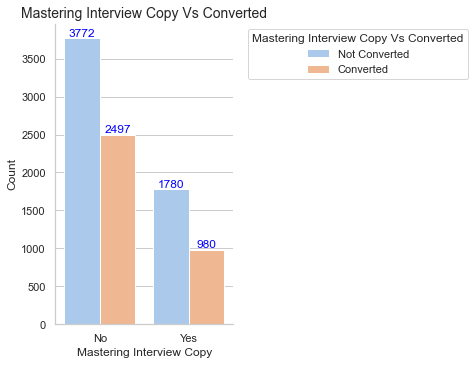

In [81]:
# Data Analysis on 'A free copy of Mastering The Interview'

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted",legend=False, kind="count", data=df, palette="pastel",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
plt.legend(title="Mastering Interview Copy Vs Converted", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Observations:
- The leads who are not interested in receiving a free copy of Mastering Interviews exhibit a notable increase in conversion rate.

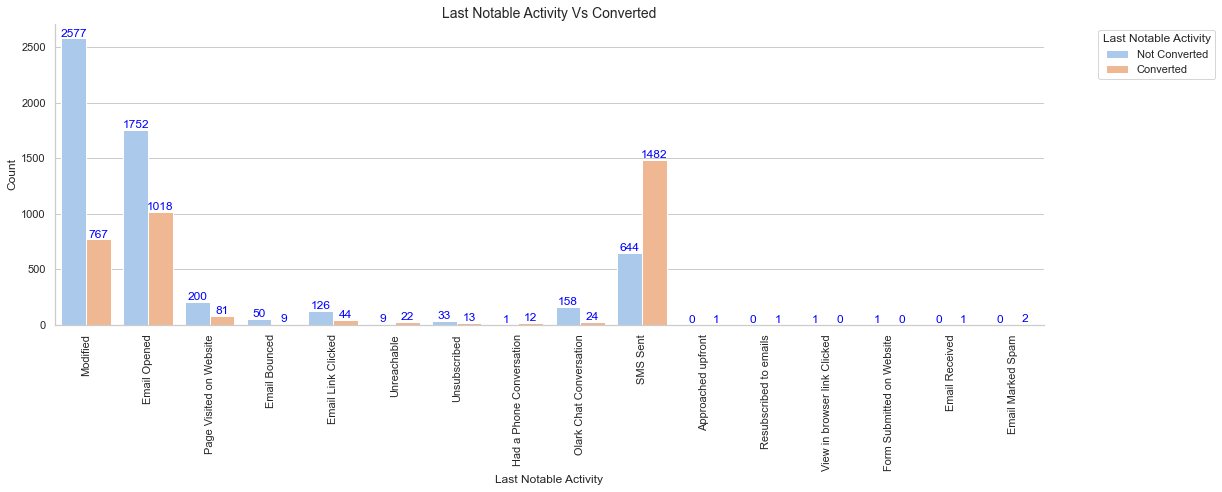

In [82]:
# Analysis on Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted",legend=False, kind="count", data=df, palette="pastel", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.legend(title="Last Notable Activity", labels=["Not Converted", "Converted"],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Observations:
- Conversion rate are high for 'Sms Sent' & "Email Open"

In [83]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [84]:
#Analysis on Newspaper
df['Newspaper'].value_counts()


No     9028
Yes       1
Name: Newspaper, dtype: int64

### Observation:
- Since it has only one value as 'Yes' so it won't make much sense to keep it.

In [85]:
df.drop('Newspaper',axis=1,inplace=True)

In [86]:
#Analysis on Newspaper
df['X Education Forums'].value_counts()


No    9029
Name: X Education Forums, dtype: int64

### Observations:
- It has only 'No' as a value so we can drop it as well

In [87]:
df.drop('X Education Forums',axis=1,inplace=True)

In [88]:
#Analysis on Newspaper Article
df['Newspaper Article'].value_counts()


No    9029
Name: Newspaper Article, dtype: int64

### Observations
- Since Newspaper article has only one column so we can drop it.

In [89]:
df.drop('Newspaper Article',axis=1,inplace=True)

### Observation:
- Since it has only No as a value so we can drop this variable.

## Encoding Data for Modelling (Data Preparation):

In [90]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,Modified


In [91]:
df['Lead Origin'].value_counts()

Landing Page Submission    4716
API                        3540
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             9029 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Do Not Call                             9029 non-null   object 
 6   Converted                               9029 non-null   int64  
 7   TotalVisits                             9029 non-null   float64
 8   Total Time Spent on Website             9029 non-null   int64  
 9   Page Views Per Visit                    9029 non-null   float64
 10  Last Activity                           9029 non-null   obje

## First convert categorical values in one-hot encoding

In [93]:
# Perform one-hot encoding on multiple columns
encoded_df = pd.get_dummies(df, columns=['Lead Origin', 'Lead Origin','Last Activity','What is your current occupation','Last Notable Activity'])
encoded_df

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,No,No,0,0.0,0,0.00,No,No,No,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,No,No,0,5.0,674,2.50,No,No,No,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,No,No,1,2.0,1532,2.00,No,No,No,Yes,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,No,No,0,1.0,305,1.00,No,No,No,No,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,No,No,1,2.0,1428,1.00,No,No,No,No,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Direct Traffic,Yes,No,1,8.0,1845,2.67,No,No,No,No,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Direct Traffic,No,No,0,2.0,238,2.00,No,No,No,Yes,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Direct Traffic,Yes,No,0,2.0,199,2.00,No,No,No,Yes,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Google,No,No,1,3.0,499,3.00,No,No,No,No,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,Email Opened


In [95]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [96]:
var_list =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']
#Converting binary vars to 0's & 1's
df[var_list] = df[var_list].apply(binary_map)

In [97]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened


In [98]:
encoded_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Ol

In [99]:
#Below columns are already encoded so they are not longer needed
df.drop(columns=['Prospect ID','Converted', 'Lead Number', 'Lead Origin', 'Lead Source','Last Activity','What is your current occupation','Last Notable Activity'],inplace=True)

In [100]:
#concatinating the encoded df
df_enc = pd.concat([df,encoded_df], axis=1)
df_enc.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,No,No,0,0.0,0,0.0,No,No,No,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,No,No,0,5.0,674,2.5,No,No,No,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [101]:
#Below columns are already encoded so they are not longer needed
df_enc.drop(columns=['Prospect ID', 'Lead Number',
       'Lead Source', 'Do Not Email', 'Do Not Call','Search', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview','Last Notable Activity_Approached upfront','Last Notable Activity_Email Received','Last Notable Activity_Resubscribed to emails'],axis=1,inplace=True)

In [102]:
df_enc.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,5.0,674,2.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,2.0,1532,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1.0,305,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Train-Test Split

In [103]:
#Taking Out Dependent variable in variable X
y=df_enc['Converted']
X=df_enc.drop('Converted',axis=1)

In [104]:
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.00,0.0,0,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.50,5.0,674,2.50,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.00,2.0,1532,2.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1.0,305,1.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.00,2.0,1428,1.00,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,8.0,1845,2.67,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9236,2.0,238,2.00,2.0,238,2.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,2.0,199,2.00,2.0,199,2.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,3.0,499,3.00,3.0,499,3.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [105]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Scaling the features usin Min-Max Scaler

In [106]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [107]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


## Feature Selection & Model Building

In [108]:
y_train

2240    0
113     0
4132    1
5573    0
1109    0
       ..
5854    1
5292    1
5496    0
885     0
7430    0
Name: Converted, Length: 6320, dtype: int64

In [109]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2240,0.1875,0.898963,0.375,0.1875,0.898963,0.375,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
113,0.3125,0.706360,0.625,0.3125,0.706360,0.625,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4132,0.3750,0.768155,0.750,0.3750,0.768155,0.750,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5573,0.1250,0.028868,0.250,0.1250,0.028868,0.250,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1109,0.0625,0.009021,0.125,0.0625,0.009021,0.125,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [110]:
# Logistic regression model using Stats Model
log_sm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_sm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 15 Aug 2023   Deviance:                   1.3383e+05
Time:                        18:43:31   Pearson chi2:                 6.54e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.626e+15    1.1e+07   1.48e+08      0.000    1.63e+15    1.63e+15
TotalVisits                                           5.685e+13   3.71e+06   1.53e+07      0.000    5.68e+13    5.68e+13
Total Time Spent on Website                           6.783e+14   1.92e+06   3.53e+08      0.000    6.78e+14    6.78e+14
Page Views Per Visit                                 -3.391e+13   3.03e+06  -1.12e+07      0.000   -3.39e+13   -3.39e+13
TotalVisits                                           5.685e+13   3.71e+06   1.53e+07      0.000    5.68e+13    5.68e+13
Total Time Spent on Website                           6.783e+14   1.92e+06   3.53e+08      0.000    6.78e+14    6.78e+14
Page Views Per Visit                                 -3.391e+13   3.03e+06  -1.12e+07      0.000   -3.39e+13   -3.39e+13
Lead Origin_API                                      -7.412e+14   5.44e+06  -1.36e+08      0.000   -7.41e+14   -7.41e+14
Lead Origin_Landing Page Submission                  -8.209e+14   5.45e+06  -1.51e+08      0.000   -8.21e+14   -8.21e+14
Lead Origin_Lead Add Form                             -1.13e+14   5.55e+06  -2.03e+07      0.000   -1.13e+14   -1.13e+14
Lead Origin_Lead Import                              -4.481e+14   6.95e+06  -6.45e+07      0.000   -4.48e+14   -4.48e+14
Lead Origin_Quick Add Form                            3.749e+15   2.86e+07   1.31e+08      0.000    3.75e+15    3.75e+15
Lead Origin_API                                      -7.412e+14   5.44e+06  -1.36e+08      0.000   -7.41e+14   -7.41e+14
Lead Origin_Landing Page Submission                  -8.209e+14   5.45e+06  -1.51e+08      0.000   -8.21e+14   -8.21e+14
Lead Origin_Lead Add Form                             -1.13e+14   5.55e+06  -2.03e+07      0.000   -1.13e+14   -1.13e+14
Lead Origin_Lead Import                              -4.481e+14   6.95e+06  -6.45e+07      0.000   -4.48e+14   -4.48e+14
Lead Origin_Quick Add Form                            3.749e+15   2.86e+07   1.31e+08      0.000    3.75e+15    3.75e+15
Last Activity_Approached upfront                      3.596e+15   2.69e+07   1.33e+08      0.000     3.6e+15     3.6e+15
Last Activity_Converted to Lead                      -2.791e+14   9.01e+06   -3.1e+07      0.000   -2.79e+14   -2.79e+14
Last Activity_Email Bounced                          -7.344e+14   9.43e+06  -7.79e+07      0.000   -7.34e+14   -7.34e+14
Last Activity_Email Link Clicked                      2.838e+14   1.11e+07   2.55e+07      0.000    2.84e+14    2.84e+14
Last Activity_Email Marked Spam                       2.045e+15   2.27e+07   9.01e+07      0.000    2.05e+15    2.05e+15
Last Activity_Email Opened                           -1.51

### Feature Selection using RFE

In [111]:
logreg = LogisticRegression()
#Selecting Top 20 features
rfe = RFE(estimator=logreg, n_features_to_select=20)          
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([False,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
        True,  True, False, False, False,  True, False, False])

In [113]:
#SElected columns
cols=X_train.columns[rfe.support_]

In [114]:
cols

Index(['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Add Form',
       'Last Activity_Approached upfront', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_No Information',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Building Model with stats model to check the feature importance


In [115]:
X_train_sm = sm.add_constant(X_train[cols])
log_sm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_sm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.6
Date:                Tue, 15 Aug 2023   Deviance:                       5167.1
Time:                        18:43:36   Pearson chi2:                 6.31e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8592      0.122    -15.185      0.000      -2.099      -1.619
Total Time Spent on Website                              0.9902      0.039     25.674      0.000       0.915       1.066
Total Time Spent on Website                              0.9902      0.039     25.674      0.000       0.915       1.066
Page Views Per Visit                                    -0.4919      0.058     -8.535      0.000      -0.605      -0.379
Page Views Per Visit                                    -0.4919      0.058     -8.535      0.000      -0.605      -0.379
TotalVisits                                              0.6229      0.138      4.507      0.000       0.352       0.894
TotalVisits                                              0.6229      0.138      4.507      0.000       0.352       0.894
Total Time Spent on Website                              0.9902      0.039     25.674      0.000       0.915       1.066
Total Time Spent on Website                              0.9902      0.039     25.674      0.000       0.915       1.066
Page Views Per Visit                                    -0.4919      0.058     -8.535      0.000      -0.605      -0.379
Page Views Per Visit                                    -0.4919      0.058     -8.535      0.000      -0.605      -0.379
Lead Origin_Lead Add Form                                0.7720      0.047     16.470      0.000       0.680       0.864
Lead Origin_Lead Add Form                                0.7720      0.047     16.470      0.000       0.680       0.864
Lead Origin_Lead Add Form                                0.7720      0.047     16.470      0.000       0.680       0.864
Lead Origin_Lead Add Form                                0.7720      0.047     16.470      0.000       0.680       0.864
Last Activity_Approached upfront                        24.6825   2.57e+04      0.001      0.999   -5.04e+04    5.05e+04
Last Activity_Email Bounced                             -1.1901      0.320     -3.714      0.000      -1.818      -0.562
Last Activity_Email Link Clicked                         1.0946      0.344      3.180      0.001       0.420       1.769
Last Activity_Email Opened                               0.7148      0.113      6.309      0.000       0.493       0.937
Last Activity_Had a Phone Conversation                   1.2229      0.916      1.334      0.182      -0.573       3.019
Last Activity_SMS Sent                                   1.8218      0.116     15.749      0.000       1.595       2.048
What is your current occupation_Housewife               23.7781   2.43e+04      0.001      0.999   -4.77e+04    4.77e+04
What is your current occupation_No Information          -1

 - Last Activity_Approached upfront has high p value so dropping the variable

In [116]:
cols=cols.drop('Last Activity_Approached upfront',1)

# Checking again with stats model

In [117]:
X_train_sm = sm.add_constant(X_train[cols])
log_sm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_sm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.2
Date:                Tue, 15 Aug 2023   Deviance:                       5182.4
Time:                        18:43:39   Pearson chi2:                 6.31e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8354      0.122    -15.064      0.000      -2.074      -1.597
Total Time Spent on Website                              0.9901      0.039     25.708      0.000       0.915       1.066
Total Time Spent on Website                              0.9901      0.039     25.708      0.000       0.915       1.066
Page Views Per Visit                                    -0.4898      0.058     -8.511      0.000      -0.603      -0.377
Page Views Per Visit                                    -0.4898      0.058     -8.511      0.000      -0.603      -0.377
TotalVisits                                              0.6130      0.138      4.441      0.000       0.342       0.884
TotalVisits                                              0.6130      0.138      4.441      0.000       0.342       0.884
Total Time Spent on Website                              0.9901      0.039     25.708      0.000       0.915       1.066
Total Time Spent on Website                              0.9901      0.039     25.708      0.000       0.915       1.066
Page Views Per Visit                                    -0.4898      0.058     -8.511      0.000      -0.603      -0.377
Page Views Per Visit                                    -0.4898      0.058     -8.511      0.000      -0.603      -0.377
Lead Origin_Lead Add Form                                0.7723      0.047     16.501      0.000       0.681       0.864
Lead Origin_Lead Add Form                                0.7723      0.047     16.501      0.000       0.681       0.864
Lead Origin_Lead Add Form                                0.7723      0.047     16.501      0.000       0.681       0.864
Lead Origin_Lead Add Form                                0.7723      0.047     16.501      0.000       0.681       0.864
Last Activity_Email Bounced                             -1.2167      0.320     -3.799      0.000      -1.844      -0.589
Last Activity_Email Link Clicked                         1.0651      0.344      3.096      0.002       0.391       1.739
Last Activity_Email Opened                               0.6928      0.113      6.147      0.000       0.472       0.914
Last Activity_Had a Phone Conversation                   1.1927      0.916      1.302      0.193      -0.603       2.988
Last Activity_SMS Sent                                   1.7992      0.115     15.635      0.000       1.574       2.025
What is your current occupation_Housewife               23.7568   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_No Information          -1.1795      0.089    -13.317      0.000      -1.353      -1.006
What is your current occupation_Working Professional     2

- 'What is your current occupation_Housewife' has high p-value so it is insignificant

In [118]:
cols=cols.drop('What is your current occupation_Housewife',1)

# Checking again with stats model


In [119]:
X_train_sm = sm.add_constant(X_train[cols])
log_sm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_sm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.3
Date:                Tue, 15 Aug 2023   Deviance:                       5194.5
Time:                        18:43:46   Pearson chi2:                 6.32e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8321      0.122    -15.060      0.000      -2.071      -1.594
Total Time Spent on Website                              0.9902      0.038     25.728      0.000       0.915       1.066
Total Time Spent on Website                              0.9902      0.038     25.728      0.000       0.915       1.066
Page Views Per Visit                                    -0.4889      0.057     -8.505      0.000      -0.602      -0.376
Page Views Per Visit                                    -0.4889      0.057     -8.505      0.000      -0.602      -0.376
TotalVisits                                              0.6099      0.138      4.421      0.000       0.340       0.880
TotalVisits                                              0.6099      0.138      4.421      0.000       0.340       0.880
Total Time Spent on Website                              0.9902      0.038     25.728      0.000       0.915       1.066
Total Time Spent on Website                              0.9902      0.038     25.728      0.000       0.915       1.066
Page Views Per Visit                                    -0.4889      0.057     -8.505      0.000      -0.602      -0.376
Page Views Per Visit                                    -0.4889      0.057     -8.505      0.000      -0.602      -0.376
Lead Origin_Lead Add Form                                0.7747      0.047     16.563      0.000       0.683       0.866
Lead Origin_Lead Add Form                                0.7747      0.047     16.563      0.000       0.683       0.866
Lead Origin_Lead Add Form                                0.7747      0.047     16.563      0.000       0.683       0.866
Lead Origin_Lead Add Form                                0.7747      0.047     16.563      0.000       0.683       0.866
Last Activity_Email Bounced                             -1.2246      0.320     -3.822      0.000      -1.853      -0.597
Last Activity_Email Link Clicked                         1.0560      0.344      3.069      0.002       0.382       1.730
Last Activity_Email Opened                               0.6964      0.113      6.190      0.000       0.476       0.917
Last Activity_Had a Phone Conversation                   1.1821      0.916      1.290      0.197      -0.614       2.978
Last Activity_SMS Sent                                   1.7957      0.115     15.622      0.000       1.570       2.021
What is your current occupation_No Information          -1.1849      0.089    -13.386      0.000      -1.358      -1.011
What is your current occupation_Working Professional     2.5714      0.201     12.777      0.000       2.177       2.966
Last Notable Activity_Email Link Clicked                -1

- 'Last Activity_Had a Phone Conversation' has a high p-value so it's a insignificant

In [120]:
cols=cols.drop('Last Activity_Had a Phone Conversation',1)

In [121]:
X_train[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 2240 to 7430
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Total Time Spent on Website                           6320 non-null   float64
 1   Total Time Spent on Website                           6320 non-null   float64
 2   Page Views Per Visit                                  6320 non-null   float64
 3   Page Views Per Visit                                  6320 non-null   float64
 4   TotalVisits                                           6320 non-null   float64
 5   TotalVisits                                           6320 non-null   float64
 6   Total Time Spent on Website                           6320 non-null   float64
 7   Total Time Spent on Website                           6320 non-null   float64
 8   Page Views Per Visit                                  6

In [122]:
X_train[cols].isna().sum()

Total Time Spent on Website                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Page Views Per Visit                                    0
TotalVisits                                             0
TotalVisits                                             0
Total Time Spent on Website                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Page Views Per Visit                                    0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Add Form                               0
Last Activity_Email Bounced                             0
Last Activity_Email Link Clicked                        0
Last Activity_Email Opened                              0
Last Activity_

In [123]:
# Checking again with stats model
X_train_sm = sm.add_constant(X_train[cols])
log_sm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_sm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.1
Date:                Tue, 15 Aug 2023   Deviance:                       5196.2
Time:                        18:43:49   Pearson chi2:                 6.17e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8243      0.121    -15.032      0.000      -2.062      -1.586
Total Time Spent on Website                              0.9909      0.038     25.750      0.000       0.915       1.066
Total Time Spent on Website                              0.9909      0.038     25.750      0.000       0.915       1.066
Page Views Per Visit                                    -0.4880      0.057     -8.490      0.000      -0.601      -0.375
Page Views Per Visit                                    -0.4880      0.057     -8.490      0.000      -0.601      -0.375
TotalVisits                                              0.6073      0.138      4.404      0.000       0.337       0.878
TotalVisits                                              0.6073      0.138      4.404      0.000       0.337       0.878
Total Time Spent on Website                              0.9909      0.038     25.750      0.000       0.915       1.066
Total Time Spent on Website                              0.9909      0.038     25.750      0.000       0.915       1.066
Page Views Per Visit                                    -0.4880      0.057     -8.490      0.000      -0.601      -0.375
Page Views Per Visit                                    -0.4880      0.057     -8.490      0.000      -0.601      -0.375
Lead Origin_Lead Add Form                                0.7763      0.047     16.597      0.000       0.685       0.868
Lead Origin_Lead Add Form                                0.7763      0.047     16.597      0.000       0.685       0.868
Lead Origin_Lead Add Form                                0.7763      0.047     16.597      0.000       0.685       0.868
Lead Origin_Lead Add Form                                0.7763      0.047     16.597      0.000       0.685       0.868
Last Activity_Email Bounced                             -1.2367      0.320     -3.860      0.000      -1.865      -0.609
Last Activity_Email Link Clicked                         1.0444      0.344      3.035      0.002       0.370       1.719
Last Activity_Email Opened                               0.6873      0.112      6.128      0.000       0.467       0.907
Last Activity_SMS Sent                                   1.7865      0.115     15.591      0.000       1.562       2.011
What is your current occupation_No Information          -1.1870      0.088    -13.415      0.000      -1.360      -1.014
What is your current occupation_Working Professional     2.5759      0.201     12.808      0.000       2.182       2.970
Last Notable Activity_Email Link Clicked                -1.0176      0.443     -2.299      0.021      -1.885      -0.150
Last Notable Activity_Had a Phone Conversation           3

### Observations
- Now model is stable as all the p-values are smaller


In [ ]:
## Applying Logistic Regression

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train[cols], y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test[cols])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [128]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [132]:
y_train_pred = batch_predict(model, X_train[cols])    
y_test_pred = batch_predict(model, X_test[cols])

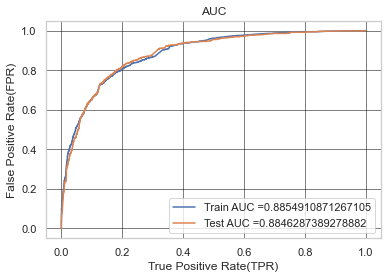

In [134]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = 0.1,penalty='l2',class_weight='balanced')

model.fit(X_train[cols], y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_train[cols])    
y_test_pred = batch_predict(model, X_test[cols])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

 ### we got Train AUC of 0.88 and Test AUC 0.88 where Aplpha is 0.1

In [137]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
import numpy as np
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [138]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6477152563443342 for threshold 0.513
Train confusion matrix
[[3168  690]
 [ 520 1942]]
Test confusion matrix
[[1397  297]
 [ 212  803]]


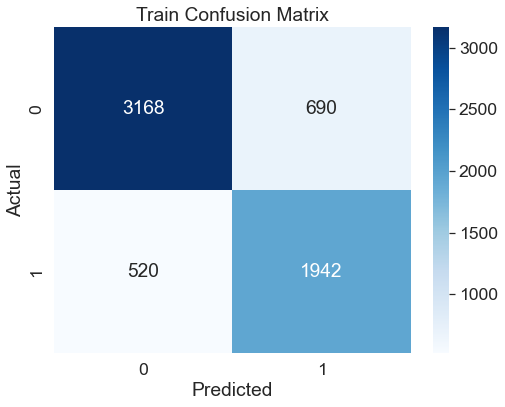

In [141]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

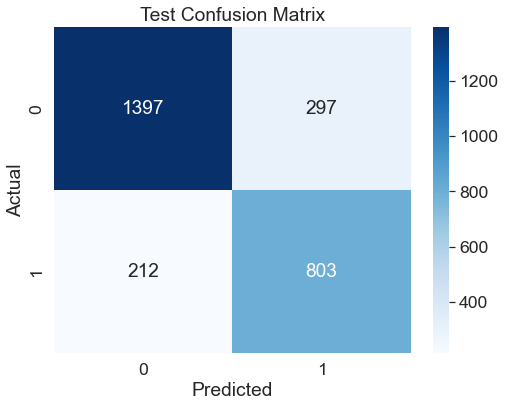

In [143]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_test))
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [145]:
accuracy = accuracy_score(y_test, predict_with_best_t(y_test_pred, best_t))

In [146]:
accuracy

0.8121077888519749

## Therefore, it is evident that the ultimate forecasted conversion rate stands at 81% (approximately 81.2%).

## Other Metrics

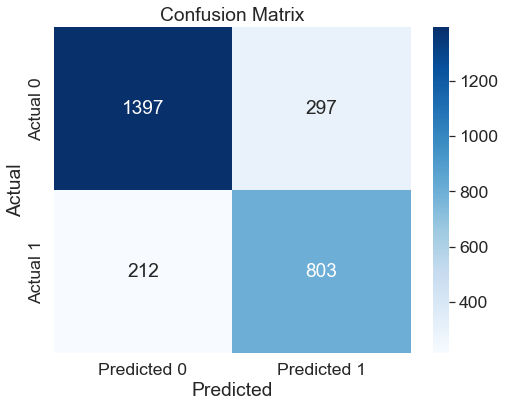

In [147]:
conf_met= metrics.confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_met, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [148]:
TP = conf_met[1,1] # true positive 
FP = conf_met[0,1] # false positives
TN = conf_met[0,0] # true negatives
FN = conf_met[1,0] # false negatives

### Sensitivity

In [149]:
TP / float(TP+FN)

0.7911330049261084

### Specificity

In [150]:
TN / float(TN+FP)

0.8246753246753247

### False Positive Rate


In [151]:
print(FP/ float(TN+FP))

0.17532467532467533


### positive predictive value 

In [152]:
print (TP / float(TP+FP))

0.73


### Negative predictive value


In [153]:
print (TN / float(TN+ FN))

0.8682411435674332


## Precion and Recall trade-ff b/w test dataset

In [154]:
from sklearn.metrics import precision_score,recall_score
# precision
print('precision ',precision_score(y_test, predict_with_best_t(y_test_pred, best_t)))

# recall
print('recall ',recall_score(y_test, predict_with_best_t(y_test_pred, best_t)))

precision  0.73
recall  0.7911330049261084


In [155]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)

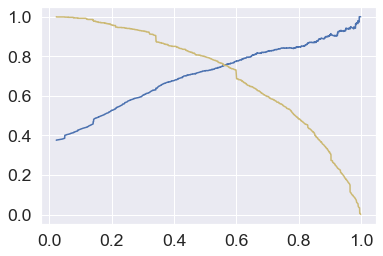

In [156]:
plt.plot(thresholds, precision[:-1], "b-")
plt.plot(thresholds, recall[:-1], "y-")
plt.show()

Observations:

- After evaluataing both Sensitivity-Specificity and Precision-Recall metrics, we have selected the optimal threshold based on Sensitivity and Specificity to make the final predictions.
- The test set demonstrates Accuracy, Sensitivity, and Specificity rates of roughly 81%, 79%, and 82%, respectively, which closely align with the corresponding values derived from the training set.
- Furthermore, the lead score computed using the training data indicates an approximate 80% conversion rate for the final predictive model.
- In summary, the overall performance of this model appears favorable.